In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
from keras import models
from keras import layers
from keras import regularizers

def build_model():
    model = models.Sequential()
    #model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
    #                   activation='relu', input_shape=(10000,)))
    #model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
    #                   activation='relu'))
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.1))
                           
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [55]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [56]:
model = build_model()
history = model.fit(partial_x_train,
partial_y_train,
epochs=15,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 4s 253us/step - loss: 0.5316 - acc: 0.7727 - val_loss: 0.3993 - val_acc: 0.8623
Epoch 2/15
15000/15000 [==============================] - 3s 184us/step - loss: 0.3367 - acc: 0.8867 - val_loss: 0.3298 - val_acc: 0.8708
Epoch 3/15
15000/15000 [==============================] - 3s 179us/step - loss: 0.2531 - acc: 0.9119 - val_loss: 0.2822 - val_acc: 0.8905
Epoch 4/15
15000/15000 [==============================] - 3s 178us/step - loss: 0.2010 - acc: 0.9325 - val_loss: 0.2742 - val_acc: 0.8899
Epoch 5/15
15000/15000 [==============================] - 3s 179us/step - loss: 0.1640 - acc: 0.9445 - val_loss: 0.2865 - val_acc: 0.8869
Epoch 6/15
15000/15000 [==============================] - 3s 179us/step - loss: 0.1354 - acc: 0.9545 - val_loss: 0.2939 - val_acc: 0.8839
Epoch 7/15
15000/15000 [==============================] - 3s 179us/step - loss: 0.1146 - acc: 0.9639 - val_loss: 0.3068 - 

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

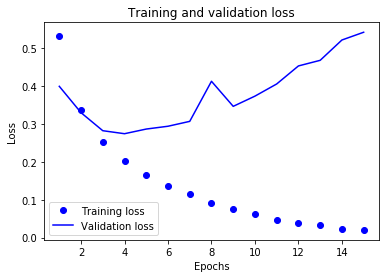

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

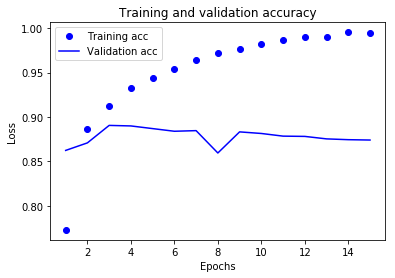

In [59]:
#plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model = build_model()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.5202 - acc: 0.7711
Epoch 2/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.3258 - acc: 0.8824
Epoch 3/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.2457 - acc: 0.9128
Epoch 4/4
25000/25000 [==============================] - 4s 140us/step
[0.289537876663208, 0.88436]


In [61]:
model.predict(x_test)

array([[0.15904038],
       [0.9999082 ],
       [0.8950683 ],
       ...,
       [0.10441165],
       [0.1021955 ],
       [0.5526571 ]], dtype=float32)